## Singular Value Decomposition

Here's a simple example of using Singular Value Decomposition (SVD) in Python, using the scikit-learn library, to achieve dimensionality reduction on a Word-Document matrix:

In [2]:
pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 6.2 MB/s eta 0:00:0000:010:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 13.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import 

In [3]:
from sklearn.decomposition import TruncatedSVD

# Create a sample Word-Document matrix
C = [[1, 2, 0, 1, 0],
     [0, 1, 1, 0, 0],
     [1, 0, 0, 1, 1],
     [0, 1, 1, 2, 1],
     [0, 0, 1, 1, 1]]

# Apply Singular Value Decomposition
svd = TruncatedSVD(n_components=2)  # Specify the desired number of dimensions
U = svd.fit_transform(C)
E = svd.explained_variance_
Vt = svd.components_

# Print the decomposed matrices
print("Matrix U:")
print(U)
print("\nExplained Variance:")
print(E)
print("\nMatrix V^T:")
print(Vt)


Matrix U:
[[ 1.9033128   1.5       ]
 [ 0.83678751  0.5       ]
 [ 1.25845291 -0.5       ]
 [ 2.54817269 -0.5       ]
 [ 1.37005015 -1.        ]]

Explained Variance:
[0.34833391 0.8       ]

Matrix V^T:
[[ 0.22146275  0.50372751  0.33306     0.67439503  0.36259513]
 [ 0.25        0.75       -0.25       -0.25       -0.5       ]]


In this example, we start by creating a sample Word-Document matrix `C`, where rows represent documents and columns represent words. Each entry in the matrix represents the frequency or occurrence of a word in a particular document.

We then use the `TruncatedSVD` class from scikit-learn to perform Singular Value Decomposition on the matrix `C`. We specify the desired number of dimensions (`n_components=2` in this case) that we want to reduce the matrix to.

The `fit_transform()` method is used to decompose the matrix `C`. It returns the transformed matrix `U`, which represents the reduced dimensions. The `explained_variance_` attribute gives us the explained variance for each of the selected dimensions. The components_ attribute provides the matrix `V^T`, which represents the importance of each word in the reduced dimensions.

Finally, we print the decomposed matrices `U`, `E`, and `V^T` to demonstrate the results of the dimensionality reduction process.

**Note** that in a real-world scenario, you would typically apply pre-processing steps like tokenization, stemming, stop-word removal, etc., to the raw text data before constructing the Word-Document matrix. This example focuses solely on the SVD aspect for simplicity.

### Explained Variance

**Explained Variance** indicates the contribution of each singular value towards explaining the total variance in the data. 

The explained variance is calculated by taking the **square of each singular value** and dividing it by the sum of the squares of all the singular values. This ratio represents the proportion of total variance explained by that singular value.

By examining the explained variance, we can determine which singular values contribute the most to the overall variance in the data. The cumulative sum of the explained variance provides an indication of how many dimensions are required to capture a desired amount of variance. A higher cumulative sum suggests that fewer dimensions are needed to represent a significant portion of the variance.

By considering the explained variance, we can effectively determine the appropriate number of dimensions to retain during dimensionality reduction using SVD.

In [7]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Create a sample Word-Document matrix
C = np.array([[1, 2, 0, 1, 0],
              [0, 1, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 1, 2, 1],
              [0, 0, 1, 1, 1]])

# Apply Singular Value Decomposition
svd = TruncatedSVD(n_components=2)  # Specify the desired number of dimensions
U = svd.fit_transform(C)
E = svd.explained_variance_
Vt = svd.components_

# Reconstruct the original matrix
C_reconstructed = U @ np.diag(E) @ Vt

# Print the original and reconstructed matrices
print("Original Matrix C:")
print(C)
print("\nReconstructed Matrix C:")
print(C_reconstructed)


Original Matrix C:
[[1 2 0 1 0]
 [0 1 1 0 0]
 [1 0 0 1 1]
 [0 1 1 2 1]
 [0 0 1 1 1]]

Reconstructed Matrix C:
[[ 0.44682723  1.23396549 -0.07918509  0.14711607 -0.35960364]
 [ 0.16455229  0.44682723 -0.00291919  0.09657365 -0.09431024]
 [-0.00291919 -0.07918509  0.24600078  0.39562903  0.35894786]
 [ 0.09657365  0.14711607  0.39562903  0.69860311  0.52184486]
 [-0.09431024 -0.35960364  0.35894786  0.52184486  0.57304306]]


In this code, after performing SVD on the Word-Document matrix C, we reconstruct the original matrix using the decomposed matrices U, E, and V^T.

The `@` operator is used for matrix multiplication. First, we multiply U with a diagonal matrix created from E (which converts it back to the original dimensions), and then multiply the result with V^T to obtain the reconstructed matrix C_reconstructed.

Finally, we print both the original matrix C and the reconstructed matrix C_reconstructed to observe the similarity between them.

By comparing the original and reconstructed matrices, you can observe how well the dimensionality reduction process retains the essential information from the original matrix. The reconstructed matrix should closely resemble the original matrix C, indicating the effectiveness of the dimensionality reduction achieved by SVD.

In [6]:
pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.6/243.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


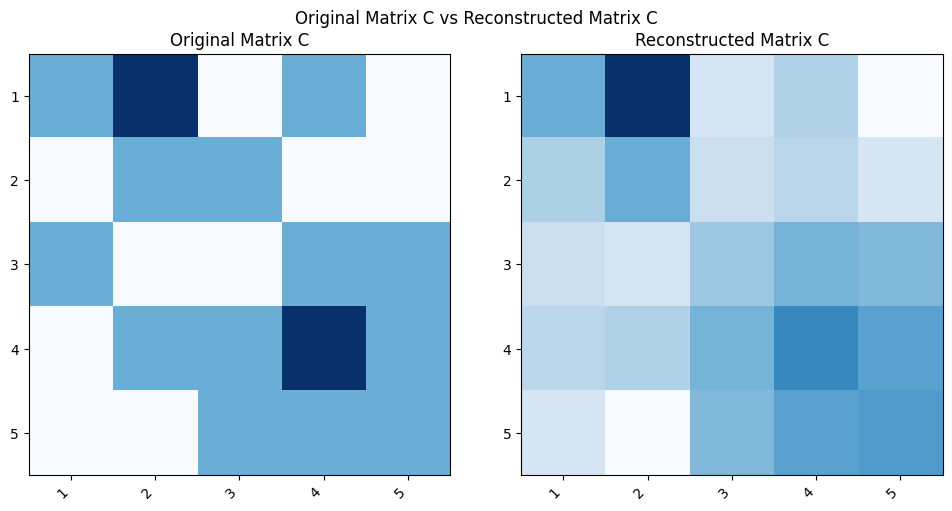

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Create a sample Word-Document matrix
C = np.array([[1, 2, 0, 1, 0],
              [0, 1, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 1, 2, 1],
              [0, 0, 1, 1, 1]])

# Apply Singular Value Decomposition
svd = TruncatedSVD(n_components=2)  # Specify the desired number of dimensions
U = svd.fit_transform(C)
E = svd.explained_variance_
Vt = svd.components_

# Reconstruct the original matrix
C_reconstructed = U @ np.diag(E) @ Vt

# Plot the original and reconstructed matrices
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Original Matrix C vs Reconstructed Matrix C')

# Plot original matrix C
axs[0].imshow(C, cmap='Blues')
axs[0].set_title('Original Matrix C')
axs[0].set_xticks(np.arange(C.shape[1]))
axs[0].set_yticks(np.arange(C.shape[0]))
axs[0].set_xticklabels(np.arange(1, C.shape[1] + 1))
axs[0].set_yticklabels(np.arange(1, C.shape[0] + 1))
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right")

# Plot reconstructed matrix C
axs[1].imshow(C_reconstructed, cmap='Blues')
axs[1].set_title('Reconstructed Matrix C')
axs[1].set_xticks(np.arange(C_reconstructed.shape[1]))
axs[1].set_yticks(np.arange(C_reconstructed.shape[0]))
axs[1].set_xticklabels(np.arange(1, C_reconstructed.shape[1] + 1))
axs[1].set_yticklabels(np.arange(1, C_reconstructed.shape[0] + 1))
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right")

# Display the plots
plt.tight_layout()
plt.show()


## How do determine the number of dimension to reduce towards?

Determining the best value for n_components (the number of components or dimensions) in an arbitrary Singular Value Decomposition (SVD) depends on the specific problem and the goals of your analysis. Here are a few approaches you can consider to determine the optimal value for n_components:

* **Domain Knowledge**: If you have prior knowledge or understanding of the problem 
domain, you can make an informed decision about the number of components. For example, in text analysis, you might know that there are typically a few main topics or themes, and you can choose n_components accordingly.

* **Explained Variance**: You can utilize the explained variance to determine the number of components that capture a significant amount of variance. By plotting the cumulative sum of explained variance against the number of components, you can identify the elbow point, where the explained variance plateaus. This can indicate the optimal value for n_components that captures a substantial portion of the variance.

* **Scree Plot**: A scree plot is another graphical approach to analyze the explained variance. It plots the singular values against their corresponding components. The plot shows the rate of decrease in the singular values, and you can choose n_components where the decrease becomes less substantial or levels off.

* **Application-Specific Evaluation**: If you have a specific downstream task or evaluation metric in mind, you can use it to guide your selection of n_components. For example, in a classification task, you can train a classifier using different values of n_components and evaluate their performance to choose the optimal value.

It's important to note that there is no definitive rule for determining the best n_components. It often involves a trade-off between capturing sufficient information while reducing dimensionality. Experimenting with different values, considering domain knowledge, and evaluating the impact on downstream tasks can help you choose the most appropriate n_components for your specific scenario.

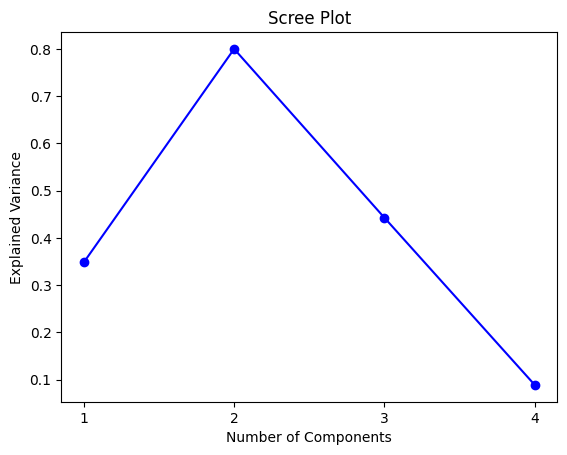

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Create a sample Word-Document matrix
C = np.array([[1, 2, 0, 1, 0],
              [0, 1, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 1, 2, 1],
              [0, 0, 1, 1, 1]])

# Apply Singular Value Decomposition
svd = TruncatedSVD(n_components=min(C.shape)-1)  # Set n_components to maximum possible value
svd.fit(C)
explained_variance = svd.explained_variance_

# Scree plot
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.show()


In this code, we set the `n_components` parameter of `TruncatedSVD` to the maximum possible value `(min(C.shape)-1)` to capture all components. We then fit the SVD on the Word-Document matrix `C` and obtain the explained variance using `explained_variance_`.

The scree plot is generated by plotting the singular values (explained variance) against the number of components. The plot displays the rate of decrease in the singular values, representing the amount of variance explained by each component.

The x-axis represents the number of components, ranging from 1 to the total number of components available. The y-axis represents the explained variance for each component.

By observing the scree plot, you can visually identify the point where the decrease in explained variance becomes less substantial or levels off. This can guide you in selecting an appropriate value for n_components that captures a significant portion of the variance while reducing dimensionality.